n_centers: 2, 	 n_samples 800, 	 n_features 100
_____________________________________________________________________________________
      init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette    quality
k-means++   0.02s    12673   1.000   1.000   1.000   1.000   1.000    0.933     1.000
PCA-based   0.00s    12673   1.000   1.000   1.000   1.000   1.000    0.933     1.000
after RF    0.17s    75152   1.000   1.000   1.000   1.000   1.000    0.603     1.000
_____________________________________________________________________________________

kmeans++ 


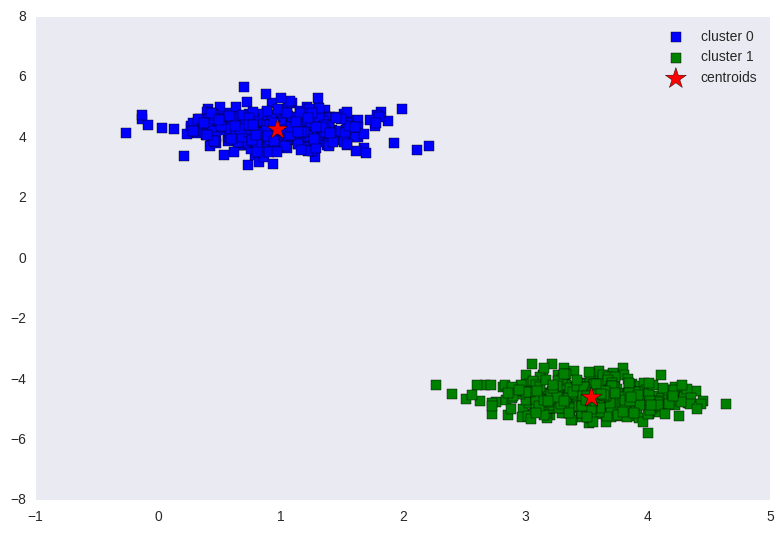

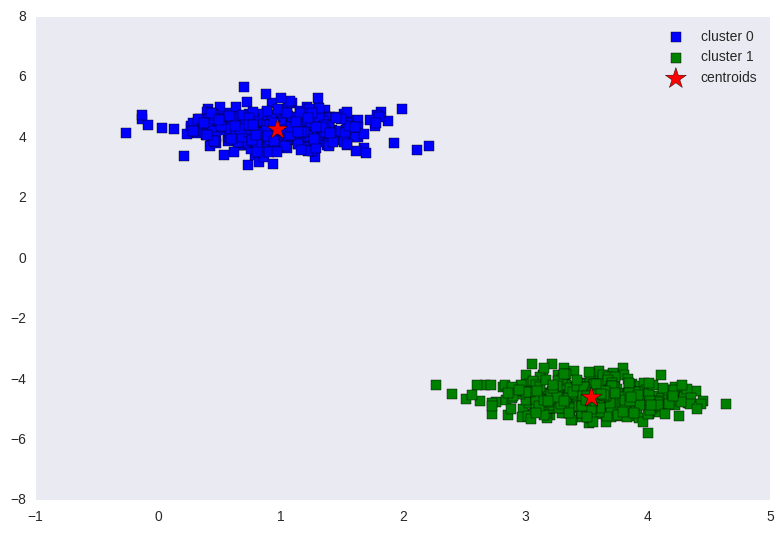

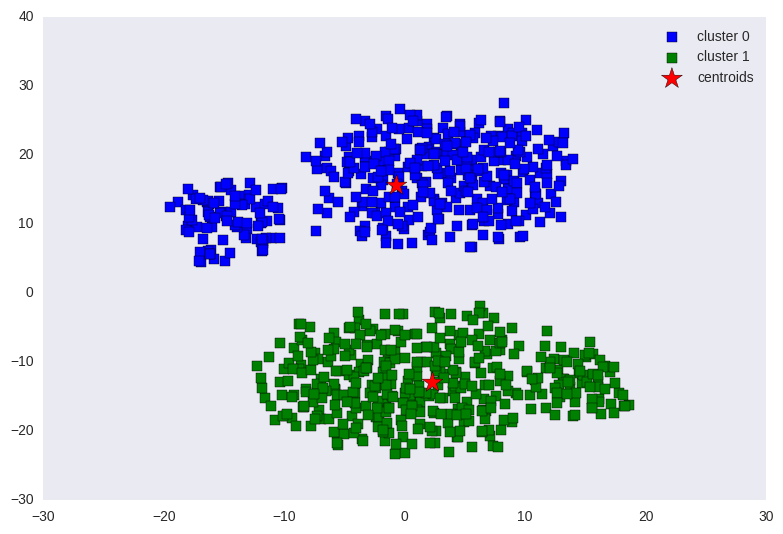

In [1]:
import time,copy, random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
import seaborn as sns
import pandas as pd

import randomForest2embedding as rfc

from sklearn.datasets import make_blobs

class Erreur (object) :
    def __init__ (self, classeOriginale) :
        self.classeOriginale = classeOriginale
        
    def _analyse (self, liste) :
        df = pd.DataFrame({'a':liste})
        return df['a'].value_counts()
    
    def erreur (self,y) :
        # on met dans chaque classe calculé (indice = index dans tableau)
        # le nom de la classe originale
        
        indice = 0
        classement = {}
        for classeCalcul in y :
            classeVoulu = self.classeOriginale [str(indice)]
            try :
                liste = classement [str(classeCalcul)]
            except:
                liste = []
            liste.append(str(classeVoulu) )
            classement [str(classeCalcul)] = liste
            indice += 1
            continue
                         
        # on analyse le classement   
        analyses = {classeCalcul : self._analyse (liste) for classeCalcul, liste in classement.items() }
        listeAnalyse = []
        nombreOK = 0
        for cle, analyse in analyses.items() :
            maximumLocal =  analyse [0]
            indexes =  [index for index in analyse.index]
            index = indexes [0]
            if index in listeAnalyse :
                nombreOk = 0
                break
            listeAnalyse.append(index )
            nombreOK += maximumLocal
            continue
        
        return nombreOK 

def bench_k_means(estimator, name, data  ) : 
    t0 = time.time()
    r = estimator.fit_predict(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f     %.3F'
          % (name, (time.time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size),
            Erreur(classeOriginale).erreur(r,)/float(len(r)),
          ))
            
    return r

centers = 2
n_features = 100
n_digits = 2
n_samples = centers*400
X, labels = make_blobs(n_samples=n_samples, 
                  n_features= n_features, 
                  centers=centers, 
                  cluster_std=0.4, 
                  shuffle=True, 
                  random_state=0)


indice = 0
classeOriginale = {}
for v in labels :
    classeOriginale [str(indice)] = int(v)
    indice += 1
    continue



sample_size = n_samples

print("n_centers: %d, \t n_samples %d, \t n_features %d"
      % (centers, n_samples, n_features))


print (85 * '_')
print ('      % 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette    quality')

kmeans_normal = KMeans(init='k-means++', n_clusters=centers, n_init=10)
resultat_kmeans_normal= bench_k_means(kmeans_normal, name="k-means++", data=X)


pca = PCA(n_components=n_digits).fit(X)
kmeans_pca = KMeans(init=pca.components_, n_clusters=centers, n_init=1)
resultat_kmeans_pca = bench_k_means(kmeans_pca , name="PCA-based", data=X)
                                      
                                      

n_trees = n_features*4

rf = rfc.RandomForest2Embedding(n_estimators=n_trees,
                               random_state=10,
                               n_jobs=-1,
                               bootstrap = True,
                               method ="bootstrap",)

embedding = rf.fit_transform(X)

kmeans_RF = KMeans( init='k-means++', n_clusters=centers, random_state=1234, n_init=20, n_jobs=-1)
resultat_kmeans_RF = bench_k_means(kmeans_RF, "after RF ", embedding, )

print(85 * '_')

print

def image_centroids (centers,km, y_km, X,
                     isCentroid = True,
                    couleurs = ['blue',
                                'green',
                                'red',
                                'cyan',
                                'magenta',
                                'yellow',
                                'black',
                                ],
                     ) :
    
    #print "centers =",centers
    for i in range(0,centers) :
        plt.scatter(X[y_km == i, 0],
                    X[y_km == i, 1],
                    s=50,
                    c= couleurs [i],
                    marker='s',
                    label='cluster '+str(i),
                    )
        continue
    if isCentroid :
        plt.scatter(km.cluster_centers_[:, 0],
                    km.cluster_centers_[:, 1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
    
    plt.legend()
    plt.grid()
    plt.tight_layout()
    #plt.savefig('./figures/image_centroids.png', dpi=300)
    return plt

print "kmeans++ "
image_centroids (centers, kmeans_normal, resultat_kmeans_normal, X, ).show()                                     
print 
image_centroids (centers, kmeans_pca, resultat_kmeans_pca, X, ).show() 
print 
image_centroids (centers, kmeans_RF, resultat_kmeans_RF, embedding, ).show() 


n_digits: 10, 	 n_samples 1797, 	 n_features 64
_____________________________________________________________________________________
      init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette    quality
k-means++   0.18s    69432   0.602   0.650   0.625   0.465   0.598    0.146     0.334
PCA-based   0.04s    70768   0.668   0.695   0.681   0.558   0.665    0.133     0.480
after RF    0.28s    21237   0.794   0.801   0.798   0.723   0.792    0.483     0.774
_____________________________________________________________________________________



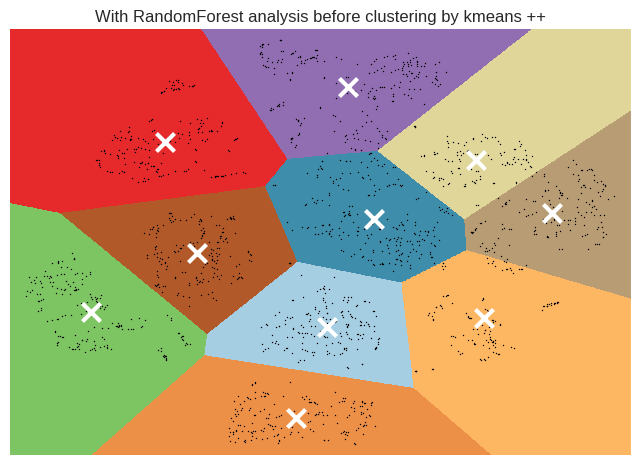

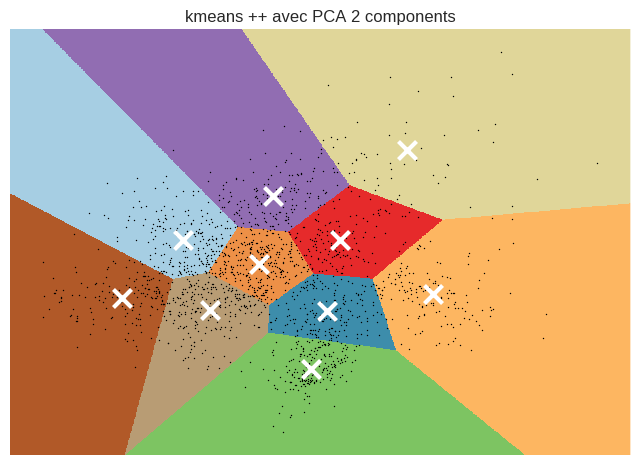

In [2]:


import time,copy, random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
import seaborn as sns
import pandas as pd

import randomForest2embedding as rfc

class Erreur (object) :
    def __init__ (self, classeOriginale) :
        self.classeOriginale = classeOriginale
        
    def _analyse (self, liste) :
        df = pd.DataFrame({'a':liste})
        return df['a'].value_counts()
    
    def erreur (self,y) :
        # on met dans chaque classe calculé (indice = index dans tableau)
        # le nom de la classe originale
        
        indice = 0
        classement = {}
        for classeCalcul in y :
            classeVoulu = self.classeOriginale [str(indice)]
            try :
                liste = classement [str(classeCalcul)]
            except:
                liste = []
            liste.append(str(classeVoulu) )
            classement [str(classeCalcul)] = liste
            indice += 1
            continue
                         
        # on analyse le classement   
        analyses = {classeCalcul : self._analyse (liste) for classeCalcul, liste in classement.items() }
        listeAnalyse = []
        nombreOK = 0
        for cle, analyse in analyses.items() :
            maximumLocal =  analyse [0]
            indexes =  [index for index in analyse.index]
            index = indexes [0]
            if index in listeAnalyse :
                nombreOk = 0
                break
            listeAnalyse.append(index )
            nombreOK += maximumLocal
            continue
        
        return nombreOK            
            
        


np.random.seed(42)

digits = load_digits()
X = data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target)) # nombre de classes voulus
labels = digits.target

indice = 0
classeOriginale = {}
for v in labels :
    classeOriginale [str(indice)] = int(v)
    indice += 1
    continue



sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print (85 * '_')
print ('      % 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette    quality')


def bench_k_means(estimator, name, data  ) : 
    t0 = time.time()
    r = estimator.fit_predict(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f     %.3F'
          % (name, (time.time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size),
            Erreur(classeOriginale).erreur(r,)/float(len(r)),
          ))
            
    return r

resultat = bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

#bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10), name="random", data=data)


pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)





n_trees = n_features*4

rf = rfc.RandomForest2Embedding(n_estimators=n_trees,
                               random_state=10,
                               n_jobs=-1,
                               bootstrap = True,
                              method ="bootstrap",)

embedding = rf.fit_transform(X)


kmeans_RF = KMeans( init='k-means++', n_clusters=10, random_state=1234, n_init=20, n_jobs=-1)
y_db = bench_k_means(kmeans_RF, "after RF ", embedding, )

print(85 * '_')

print





def plot2D(kmeans, reduced_data, title ) :
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    return plt


# on affiche le resultat
title = "With RandomForest analysis before clustering by kmeans ++"
plot2D(kmeans_RF, embedding, title).show()

print

title = "kmeans ++ avec PCA 2 components"
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
plot2D(kmeans, reduced_data, title).show()









